## Notebook to calculate monthly authorized users - Copy

This notebook calculates monthly authorized users based on history of `/v1` and `/v2` messages retrieved through the `/logs` API. The count is for all workspaces and/or skills for one service instance of Assistant. There are two options for use:
  - Process a list of files in a directory (JSON output from calls to `/logs` API in a directory. For this set `LOGS_DIR_PATH` in the next cell to point to the directory. If this value is set, the notebook will not attempt to access the service instance by API.
  - Access a service instance directly to extract the logs using the `/logs` API and then process. For this you need the `API key` and `Assistant URL` values from the settings of one of the Assistants or Skills. We're only using the URL up to the instance ID, so asny of the URLs and API keys listed on your assistant settings will work. Set them in the next cell below, or set these values to `''` and be prompted when the notebook runs. 

You can also get flattened log output in CSV format by specifying `EXPORT_FILE_PATH` in the cell below. If you do not want this output, set the value to `''` or `None`.

Code for this lives at https://github.com/kineticsquid/Utilities.git.

In [7]:
LOGS_DIR_PATH = '/Users/jk/Temp/Oficinas-Logs/Oficinas3'
api_key = ''
assistant_url = 'https://api.us-east.assistant.watson.cloud.ibm.com/instances/96a44bf2-df75-4683-852d-1187573b8948'
EXPORT_FILE_PATH = 'output.csv'

In [8]:
%pwd

'/Users/jk/DevelopmentEnvironment'

In [9]:
import string
import re
import os
import requests
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
%cd ..
import get_logs

/Users/jk


In [11]:
if LOGS_DIR_PATH is not None and len(LOGS_DIR_PATH) > 0:
    files = os.listdir(LOGS_DIR_PATH)
    all_logs = []
    for file_name in files:
        abs_path = os.path.join(LOGS_DIR_PATH, file_name)
        if os.path.isfile(abs_path) and file_name[0] != '.':
            file = open(abs_path, 'r')
            logs = json.load(file)
            all_logs += logs
            file.close()
            print('Added %s log entries from file \'%s\'.' % (len(logs), file_name))
else:
    if api_key is None or len(api_key) == 0:
        api_key = input("Enter Assistant API key")
    if assistant_url is None or len(assistant_url) == 0:
        assistant_url = input("Enter assistant or skill /v1 or /v2 API URL")
    api_regex = r'https:\/\/api..*.com\/instances\/([a-zA-Z0-9]|-)+'
    api_url = re.search(api_regex, assistant_url).group()

    os.environ['APIKEY'] = api_key
    os.environ['API_URL'] = api_url
    all_logs = get_logs.get_all_logs()
print('\n%s log entries to process.' % len(all_logs))

Added 2440 log entries from file 'es_DomiciliacionesTransferenciasPagosP1'.
Added 0 log entries from file 'es_Global_P3'.
Added 0 log entries from file 'es_Global_P2'.
Added 4514 log entries from file 'es_ComerciosP3'.
Added 0 log entries from file 'es_ClicToCall_P1'.
Added 0 log entries from file 'es_NeocsiChitChat_P1'.
Added 0 log entries from file 'es_ServiciosJuridicosP2'.
Added 11496 log entries from file 'es_TarjetasP1'.
Added 4167 log entries from file 'es_ServiciosJuridicosP3'.
Added 1883 log entries from file 'es_MinisterioDeHaciendaP1'.
Added 3316 log entries from file 'es_ComerciosP2'.
Added 0 log entries from file 'es_Neocsi_P1'.
Added 7537 log entries from file 'es_RecaudacionYOtrasOperacionesP2'.
Added 5989 log entries from file 'es_ItP1'.
Added 4133 log entries from file 'es_ChequesYOidP1'.
Added 639 log entries from file 'es_RecaudacionYOtrasOperacionesP3'.
Added 0 log entries from file 'es_DispensadoresYRecicladoresP1'.
Added 2173 log entries from file 'es_TelefoniaP1'

In [12]:
user_detail, authorized_user_counts_by_month, unique_authorized_users_by_month = get_logs.calculate_authorized_users(all_logs)

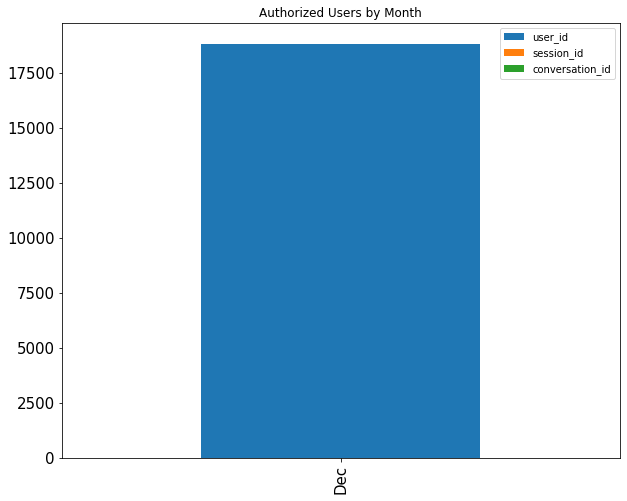

,user_id,session_id,conversation_id,Total
Dec,18804,0,8,18812
Total,18804,0,8,18812


In [13]:
user_count_df = pd.DataFrame(authorized_user_counts_by_month)
user_count_df.plot.bar(stacked=True, figsize=(10, 8), title='Authorized Users by Month', fontsize=15) 
plt.show()

user_count_df.loc["Total"] = user_count_df.sum(axis=0)
user_count_df.loc[:, "Total"] = user_count_df.sum(axis=1)
user_count_df = user_count_df.style.set_properties(**{'font-size': '12pt',})
user_count_df

In [14]:
detail_df = pd.DataFrame(user_detail)
if EXPORT_FILE_PATH is not None and len(EXPORT_FILE_PATH) > 0:
    detail_df.to_csv(EXPORT_FILE_PATH)

In [15]:
detail_df

,request_month,request_date,request_time,authorized_user,type,dialog_turn,text_length,workspace_id,billable
0,Dec,2020-12-01,05:26:08,U0160897,user_id,1,21,1a675b10-438f-4fa7-be32-8d76187dfed5,True
1,Dec,2020-12-01,05:30:15,U0137479,user_id,1,63,03e230f2-06ca-4c30-8a30-496dbceb5337,True
2,Dec,2020-12-01,05:50:49,U0141275,user_id,1,33,84e62e56-7c01-409b-a36d-85b194c8279e,True
3,Dec,2020-12-01,05:56:19,U0115773,user_id,1,43,b7682c29-5dbf-4e8b-8f4b-0ac9ebc0d0e0,True
4,Dec,2020-12-01,05:56:51,U0141275,user_id,2,58,84e62e56-7c01-409b-a36d-85b194c8279e,True
...,...,...,...,...,...,...,...,...,...
120182,Dec,2020-12-31,18:10:32,U0129281,user_id,1,44,b9780ef6-2119-4933-b52e-08dbbcc3bc15,True
120183,Dec,2020-12-31,18:22:32,U0129281,user_id,1,55,b9780ef6-2119-4933-b52e-08dbbcc3bc15,True
120184,Dec,2020-12-31,18:30:10,U0157736,user_id,1,37,a6bca1e1-81bc-4678-889c-fe26cbf8a348,True
120185,Dec,2020-12-31,18:31:06,U0153822,user_id,1,39,a6bca1e1-81bc-4678-889c-fe26cbf8a348,True
